<a href="https://colab.research.google.com/github/Joshua-Hill-Science/Landscapes/blob/ross/Landscapes/Landscapes/notebooks/exploratory/member-1/Project_4_Ross2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
! unzip sample_data/archive.zip &> /dev/null

In [3]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
from keras import regularizers
from tensorflow.keras.layers import Dropout

**Reading in image data and scaling it**

In [59]:
train_data_dir = 'seg_train/seg_train'
test_data_dir = 'seg_test/seg_test'

test_generator = ImageDataGenerator(rescale = 1.0/255).flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=64)

train_generator = ImageDataGenerator(rescale = 1.0/255).flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=64)

Found 3000 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.


**Baseline Model**

In [14]:
from tensorflow.keras.layers import MaxPooling2D

model = Sequential() 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3),))# use_bias=True)) 
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu',)) #use_bias=True)) 
model.add(Dense(6, activation='sigmoid',))# use_bias=True))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8388736   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 8,391,302
Trainable params: 8,391,302
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data = test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
220/220 [==============================] - 89s 402ms/step - loss: 0.2064 - accuracy: 0.9366 - val_loss: 0.8496 - val_accuracy: 0.7360
Epoch 2/10
220/220 [==============================] - 88s 398ms/step - loss: 0.1461 - accuracy: 0.9577 - val_loss: 0.8469 - val_accuracy: 0.7493
Epoch 3/10
220/220 [==============================] - 87s 396ms/step - loss: 0.0963 - accuracy: 0.9754 - val_loss: 0.8968 - val_accuracy: 0.7457
Epoch 4/10
220/220 [==============================] - 87s 395ms/step - loss: 0.0729 - accuracy: 0.9833 - val_loss: 1.0429 - val_accuracy: 0.7383
Epoch 5/10
220/220 [==============================] - 88s 401ms/step - loss: 0.0502 - accuracy: 0.9904 - val_loss: 1.0386 - val_accuracy: 0.7440
Epoch 6/10
220/220 [==============================] - 88s 401ms/step - loss: 0.0453 - accuracy: 0.9910 - val_loss: 1.1677 - val_accuracy: 0.7353
Epoch 7/10
220/220 [==============================] - 88s 400ms/step - loss: 0.0537 - accuracy: 0.9883 - val_loss: 1.1547 - val_ac

**Graphing**

In [ ]:
def history_graph(history):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 6))
    metrics_loss = ['loss','val_loss']
    for metric_loss in metrics_loss:
        ax1.plot(history.history[metric_loss], label=metric_loss)
        ax1.legend()
        ax1.set_title(f"Model's Loss per Epoch")
    metrics_acc = ['accuracy','val_accuracy']
    for metric_acc in metrics_acc:
        ax2.plot(history.history[metric_acc], label=metric_acc)
        ax2.legend()
        ax2.set_title(f"Model's Accuracy per Epoch")
    plt.tight_layout()

In [ ]:
history_graph(history)

**Tuning**

In [22]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = [EarlyStopping(monitor='val_loss', patience=4), 
                  ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [20]:
model = Sequential() 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3),))# use_bias=True)) 
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu',)) #use_bias=True)) 
model.add(Dense(6, activation='sigmoid',))# use_bias=True))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
history2 = model.fit_generator(
        train_generator,
        epochs=10,
        callbacks = early_stopping,
        validation_data = test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
220/220 [==============================] - 86s 392ms/step - loss: 0.8838 - accuracy: 0.6722 - val_loss: 0.7789 - val_accuracy: 0.7213
Epoch 2/10
220/220 [==============================] - 86s 389ms/step - loss: 0.6089 - accuracy: 0.7871 - val_loss: 0.7327 - val_accuracy: 0.7343
Epoch 3/10
220/220 [==============================] - 87s 395ms/step - loss: 0.4612 - accuracy: 0.8397 - val_loss: 0.7676 - val_accuracy: 0.7400
Epoch 4/10
220/220 [==============================] - 86s 393ms/step - loss: 0.3339 - accuracy: 0.8872 - val_loss: 0.7205 - val_accuracy: 0.7603
Epoch 5/10
220/220 [==============================] - 87s 395ms/step - loss: 0.2299 - accuracy: 0.9282 - val_loss: 0.7905 - val_accuracy: 0.7590
Epoch 6/10
220/220 [==============================] - 87s 396ms/step - loss: 0.1586 - accuracy: 0.9560 - val_loss: 0.8319 - val_accuracy: 0.7603
Epoch 7/10
220/220 [==============================] - 87s 395ms/step - loss: 0.1055 - accuracy: 0.9734 - val_loss: 0.9403 - val_ac

In [24]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

In [28]:
results_train = saved_model.evaluate_generator(train_generator, 400)
print(results_train)

print('----------')

results_test = saved_model.evaluate_generator(test_generator, 400)
print(results_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2190077155828476, 0.9404500722885132]
----------
[0.7182763814926147, 0.7610432505607605]


**L2 Regularization**

In [5]:
l2_reg = Sequential() 
l2_reg.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.005), input_shape=(64, 64, 3),))
l2_reg.add(MaxPooling2D((2, 2))) 
l2_reg.add(Flatten()) 
l2_reg.add(Dense(128,kernel_regularizer=regularizers.l2(0.005), activation='relu',))
l2_reg.add(Dense(6, activation='sigmoid',))

l2_reg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
l2_reg_hist = l2_reg.fit_generator(
        train_generator,
        epochs=30,
        validation_data = test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
  6/220 [..............................] - ETA: 1:29 - loss: 6.7940 - accuracy: 0.1927

KeyboardInterrupt: ignored

In [12]:
def history_graph(history):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 6))
    metrics_loss = ['loss','val_loss']
    for metric_loss in metrics_loss:
        ax1.plot(history.history[metric_loss], label=metric_loss)
        ax1.legend()
        ax1.set_title(f"Model's Loss per Epoch")
    metrics_acc = ['accuracy','val_accuracy']
    for metric_acc in metrics_acc:
        ax2.plot(history.history[metric_acc], label=metric_acc)
        ax2.legend()
        ax2.set_title(f"Model's Accuracy per Epoch")
    plt.tight_layout()

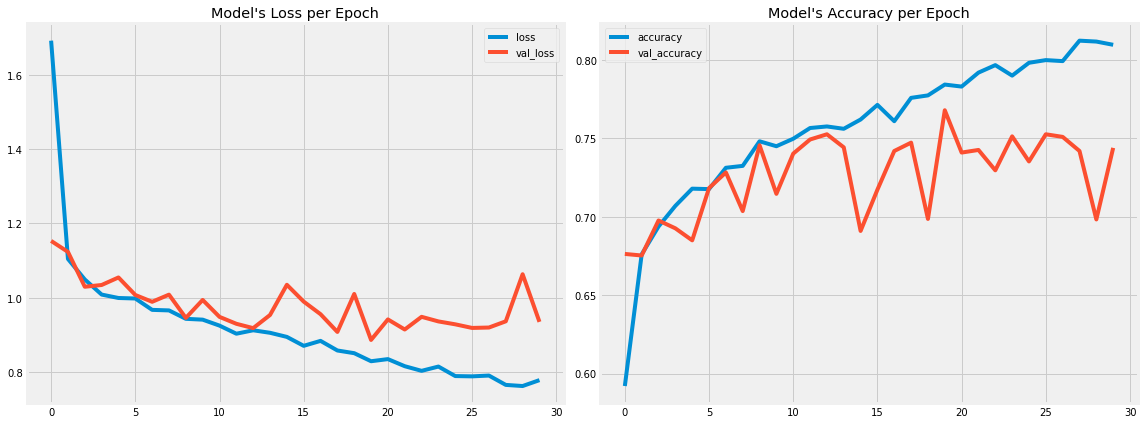

In [13]:
history_graph(l2_reg_hist)

**l1 Regularization**

In [33]:
l1_reg = Sequential() 
l1_reg.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l1(0.005), input_shape=(64, 64, 3),))
l1_reg.add(MaxPooling2D((2, 2))) 
l1_reg.add(Flatten()) 
l1_reg.add(Dense(128,kernel_regularizer=regularizers.l1(0.005), activation='relu',))
l1_reg.add(Dense(6, activation='sigmoid',))

l1_reg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
l1_reg_hist = l2_reg.fit_generator(
        train_generator,
        epochs=10,
        callbacks = early_stopping,
        validation_data = test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
220/220 [==============================] - 90s 408ms/step - loss: 0.9078 - accuracy: 0.7542 - val_loss: 1.0484 - val_accuracy: 0.6893
Epoch 2/10
220/220 [==============================] - 91s 412ms/step - loss: 0.8899 - accuracy: 0.7613 - val_loss: 0.9714 - val_accuracy: 0.7133
Epoch 3/10
220/220 [==============================] - 90s 410ms/step - loss: 0.8653 - accuracy: 0.7719 - val_loss: 0.8828 - val_accuracy: 0.7680
Epoch 4/10
220/220 [==============================] - 90s 409ms/step - loss: 0.8539 - accuracy: 0.7757 - val_loss: 0.9689 - val_accuracy: 0.7243
Epoch 5/10
220/220 [==============================] - 90s 409ms/step - loss: 0.8456 - accuracy: 0.7790 - val_loss: 0.9142 - val_accuracy: 0.7453
Epoch 6/10
220/220 [==============================] - 89s 406ms/step - loss: 0.8532 - accuracy: 0.7752 - val_loss: 0.9161 - val_accuracy: 0.7523
Epoch 7/10
220/220 [==============================] - 90s 408ms/step - loss: 0.8406 - accuracy: 0.7872 - val_loss: 0.8653 - val_ac

**Dropout**

In [36]:
drop = Sequential() 
drop.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l1(0.005), input_shape=(64, 64, 3),))
drop.add(MaxPooling2D((2, 2))) 
drop.add(Dropout(0.25))
drop.add(Flatten()) 
drop.add(Dense(128,kernel_regularizer=regularizers.l2(0.005), activation='relu',))
drop.add(Dropout(0.25))
drop.add(Dense(6, activation='sigmoid',))
drop.add(Dropout(0.25))

drop.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
drop_hist = l2_reg.fit_generator(
        train_generator,
        epochs=10,
        callbacks = early_stopping,
        validation_data = test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
220/220 [==============================] - 90s 410ms/step - loss: 0.8126 - accuracy: 0.7919 - val_loss: 0.9207 - val_accuracy: 0.7583
Epoch 2/10
220/220 [==============================] - 90s 409ms/step - loss: 0.8024 - accuracy: 0.7924 - val_loss: 0.9067 - val_accuracy: 0.7573
Epoch 3/10
220/220 [==============================] - 91s 415ms/step - loss: 0.7775 - accuracy: 0.8073 - val_loss: 0.8845 - val_accuracy: 0.7730
Epoch 4/10
220/220 [==============================] - 91s 412ms/step - loss: 0.7748 - accuracy: 0.8076 - val_loss: 0.8748 - val_accuracy: 0.7733
Epoch 5/10
220/220 [==============================] - 91s 412ms/step - loss: 0.7803 - accuracy: 0.8058 - val_loss: 0.8879 - val_accuracy: 0.7647
Epoch 6/10
220/220 [==============================] - 90s 411ms/step - loss: 0.7789 - accuracy: 0.8068 - val_loss: 0.8627 - val_accuracy: 0.7713
Epoch 7/10
220/220 [==============================] - 91s 411ms/step - loss: 0.7487 - accuracy: 0.8152 - val_loss: 0.8879 - val_ac

**Dropout and L2**

In [31]:
all = Sequential() 
all.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.002), input_shape=(64, 64, 3),))
all.add(MaxPooling2D((2, 2))) 
all.add(Flatten())
all.add(Dropout(0.25)) 
all.add(Dense(128,kernel_regularizer=regularizers.l2(0.004), activation='relu',))
all.add(Dropout(0.25))
all.add(Dense(64,kernel_regularizer=regularizers.l2(0.004), activation='relu',))
all.add(Dropout(0.25))
all.add(Dense(6, activation='sigmoid'))


all.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [32]:
all_hist = all.fit_generator(
        train_generator,
        epochs=30,
        validation_data = test_generator)
        #callbacks = early_stopping,

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
220/220 [==============================] - 124s 559ms/step - loss: 1.8005 - accuracy: 0.4793 - val_loss: 1.3502 - val_accuracy: 0.5830
Epoch 2/30
220/220 [==============================] - 123s 560ms/step - loss: 1.3707 - accuracy: 0.5961 - val_loss: 1.3644 - val_accuracy: 0.6183
Epoch 3/30
220/220 [==============================] - 118s 537ms/step - loss: 1.2825 - accuracy: 0.6372 - val_loss: 1.1380 - val_accuracy: 0.6893
Epoch 4/30
220/220 [==============================] - 115s 523ms/step - loss: 1.2308 - accuracy: 0.6629 - val_loss: 1.1049 - val_accuracy: 0.7053
Epoch 5/30
220/220 [==============================] - 114s 517ms/step - loss: 1.2035 - accuracy: 0.6783 - val_loss: 1.0836 - val_accuracy: 0.7080
Epoch 6/30
220/220 [==============================] - 114s 519ms/step - loss: 1.1682 - accuracy: 0.6959 - val_loss: 1.0648 - val_accuracy: 0.7400
Epoch 7/30
220/220 [==============================] - 114s 519ms/step - loss: 1.1287 - accuracy: 0.7105 - val_loss: 1.0949 -

KeyboardInterrupt: ignored

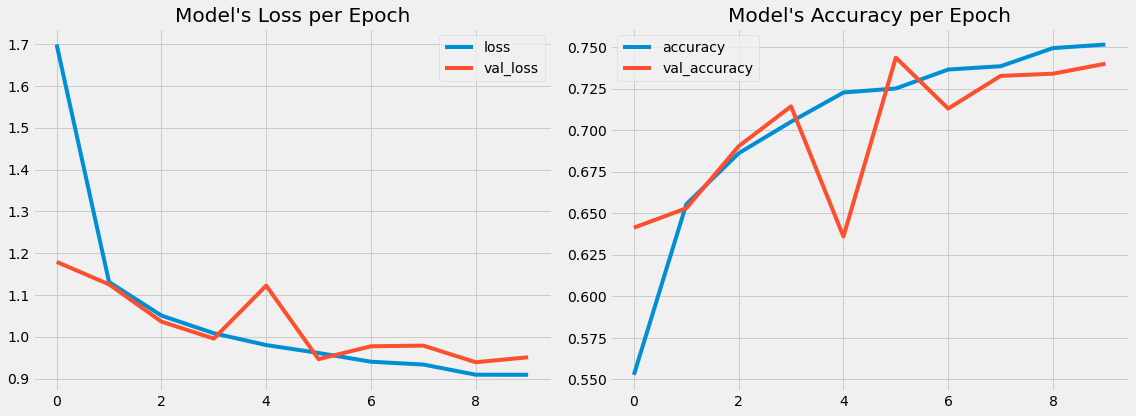

In [48]:
history_graph(all_hist)

**Adding another L2 layer to help the fluctuation**

In [8]:
l5_reg = Sequential() 
l5_reg.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.005), input_shape=(64, 64, 3),))
l5_reg.add(MaxPooling2D((2, 2))) 
l5_reg.add(Flatten()) 
l5_reg.add(Dense(128,kernel_regularizer=regularizers.l2(0.005), activation='relu'))
l5_reg.add(Dense(64,kernel_regularizer=regularizers.l2(0.005), activation='relu'))
l5_reg.add(Dense(6, activation='sigmoid'))

l5_reg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
history_5 = l5_reg.fit_generator(
        train_generator,
        epochs=10,
        validation_data = test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
220/220 [==============================] - 95s 428ms/step - loss: 1.6344 - accuracy: 0.5873 - val_loss: 1.3685 - val_accuracy: 0.6180
Epoch 2/10
220/220 [==============================] - 94s 425ms/step - loss: 1.1977 - accuracy: 0.6722 - val_loss: 1.1974 - val_accuracy: 0.6777
Epoch 3/10
220/220 [==============================] - 93s 422ms/step - loss: 1.1425 - accuracy: 0.6902 - val_loss: 1.1111 - val_accuracy: 0.7093
Epoch 4/10
220/220 [==============================] - 92s 419ms/step - loss: 1.1041 - accuracy: 0.7046 - val_loss: 1.0647 - val_accuracy: 0.7233
Epoch 5/10
220/220 [==============================] - 92s 419ms/step - loss: 1.0527 - accuracy: 0.7307 - val_loss: 1.0652 - val_accuracy: 0.7257
Epoch 6/10
220/220 [==============================] - 92s 420ms/step - loss: 1.0426 - accuracy: 0.7288 - val_loss: 1.1190 - val_accuracy: 0.6753
Epoch 7/10
220/220 [==============================] - 92s 417ms/step - loss: 1.0102 - accuracy: 0.7446 - val_loss: 1.0141 - val_ac

**Final Model**

In [9]:
from keras.optimizers import Adam
final = Sequential() 
final.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.003), input_shape=(64, 64, 3),))
final.add(MaxPooling2D((2, 2))) 
final.add(Flatten())
final.add(Dropout(0.30)) 
final.add(Dense(128,kernel_regularizer=regularizers.l2(0.003), activation='relu',))
final.add(Dropout(0.30))
final.add(Dense(6, activation='sigmoid'))
#default= 0.001
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
final.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [55]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
final_model = final.fit_generator(
        train_generator,
        epochs=22,
        validation_data = test_generator,
        callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/22
 16/220 [=>............................] - ETA: 1:33 - loss: 0.9555 - accuracy: 0.7207

KeyboardInterrupt: ignored

In [2]:
model = tensorflow.keras.models.load_model("best_model.h5")

NameError: ignored

**Prediction**

In [13]:
from PIL import Image

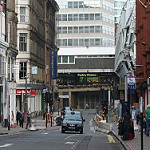

In [49]:
im = Image.open("seg_pred/seg_pred/10012.jpg")

im

In [54]:
image = tf.keras.preprocessing.image.load_img('seg_pred/seg_pred/10012.jpg', target_size=((64,64)))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = final_model.predict(input_arr)
predictions

NameError: ignored